In [1]:
#1. numPy example
import numpy as np

In [2]:
# create an array of random numbers
arr = np.random.randint(1, 100, size=10)

In [3]:
print ("Random Array: ", arr)

Random Array:  [22 39 19 47 92 47 35 44 80 44]


In [8]:
# Compute mean 
mean_val = np.mean(arr)


In [12]:
print ("Mean:", mean_val)

Mean: 46.9


In [14]:
# Compute standard deviation
std_dev = np.std(arr)

In [16]:
print ("Standard Deviation:", std_dev)

Standard Deviation: 21.791970998512273


In [18]:
#1. Pandas example
import pandas as pd

In [20]:
# generate a time-series dataset
date_rng = pd.date_range(start = '1/1/2023', periods=100, freq = 'D')

In [24]:
#cumulrative sum to create a trend
data = np.random.randn(100).cumsum() 

In [26]:
# create a DataFrame
ts_df = pd.DataFrame({'Date': date_rng, 'Stock_Price': data})

In [30]:
# set Date column as index
ts_df.set_index('Date', inplace=True)

In [32]:
# Compute moving average of 10 days
ts_df['10-day MA'] = ts_df['Stock_Price'].rolling(window=10).mean()


In [34]:
print(ts_df.tail())

            Stock_Price  10-day MA
Date                              
2023-04-06     5.151410   1.433657
2023-04-07     4.595569   2.153266
2023-04-08     6.594873   3.062027
2023-04-09     7.505138   3.925793
2023-04-10     6.086735   4.559122


In [36]:
# Compute moving average of 30 days
ts_df['30-day MA'] = ts_df['Stock_Price'].rolling(window=30).mean()

In [38]:
print(ts_df.tail())

            Stock_Price  10-day MA  30-day MA
Date                                         
2023-04-06     5.151410   1.433657  -1.117918
2023-04-07     4.595569   2.153266  -0.888273
2023-04-08     6.594873   3.062027  -0.582537
2023-04-09     7.505138   3.925793  -0.251457
2023-04-10     6.086735   4.559122   0.090409


In [15]:
#1. yFinance example
import yfinance as yf

In [17]:
import pandas as pd

In [19]:
import numpy as np

In [39]:
# Fetch historical data for a stock and the S&P 500 index (benchmark)
stock = yf.Ticker('AAPL') # Apple stock 
benchmark = yf.Ticker('^SPX')  # S&P 500

In [41]:
# Get adjusted closing prices
data = yf.download(['AAPL', '^SPX'], start='2023-01-01', end='2023-12-31')

[*********************100%***********************]  2 of 2 completed


In [43]:
print(data.head())

Price            Close                     High                      Low  \
Ticker            AAPL         ^SPX        AAPL         ^SPX        AAPL   
Date                                                                       
2023-01-03  123.632530  3824.139893  129.395518  3878.459961  122.742873   
2023-01-04  124.907700  3852.969971  127.181268  3873.159912  123.642412   
2023-01-05  123.583107  3808.100098  126.301500  3839.739990  123.326101   
2023-01-06  128.130219  3895.080078  128.792516  3906.189941  123.454587   
2023-01-09  128.654114  3892.090088  131.876655  3950.570068  128.397108   

Price                          Open                  Volume              
Ticker             ^SPX        AAPL         ^SPX       AAPL        ^SPX  
Date                                                                     
2023-01-03  3794.330078  128.782649  3853.290039  112117500  3959140000  
2023-01-04  3815.770020  125.431607  3840.360107   89113600  4414080000  
2023-01-05  3802.4199

In [50]:
# Calculate daily returns
returns = data['Close'].pct_change().dropna()

In [52]:
print("Available columns:", data.columns)

Available columns: MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', '^SPX'),
            (  'High', 'AAPL'),
            (  'High', '^SPX'),
            (   'Low', 'AAPL'),
            (   'Low', '^SPX'),
            (  'Open', 'AAPL'),
            (  'Open', '^SPX'),
            ('Volume', 'AAPL'),
            ('Volume', '^SPX')],
           names=['Price', 'Ticker'])


In [54]:
print(returns.columns)


Index(['AAPL', '^SPX'], dtype='object', name='Ticker')


In [56]:
# Compute beta (measure of stock volatility relative to the market)
cov_matrix = np.cov(returns['AAPL'], returns['^SPX'])
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

In [58]:
print(f"Apple's Beta Value: {beta}")

Apple's Beta Value: 1.1045126045409055


In [60]:
#1. Matplotlib example
import matplotlib.pyplot as plt

In [62]:
# Fetch historical stock data for multiple companies
stocks = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(stocks, start='2023-01-01', end='2023-12-31')['Close']

[*********************100%***********************]  3 of 3 completed


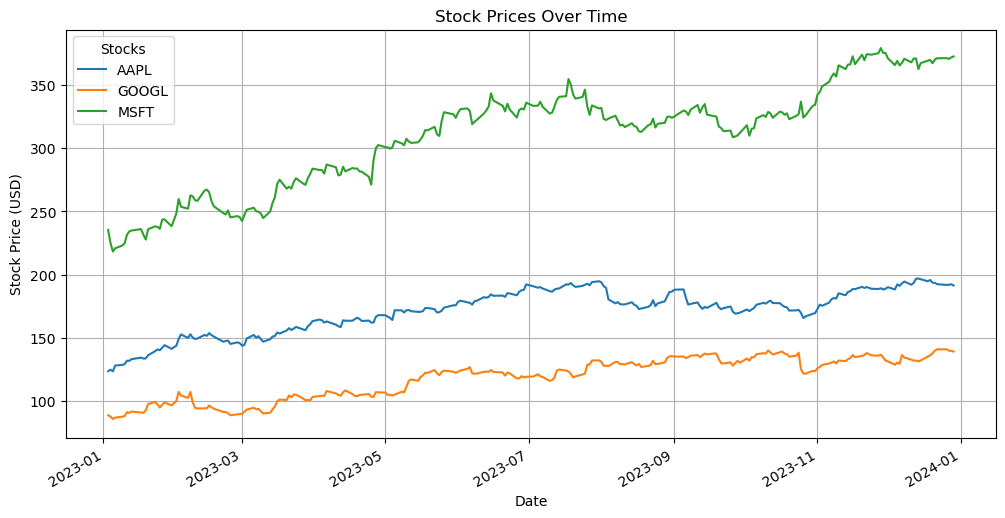

In [98]:
# Plot stock prices
data.plot(figsize=(12,6), title='Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend(title='Stocks')
plt.grid()
plt.show()

In [332]:
#2. a)
# Define the selected equities
stocks = ['RR.L', 'AML.L']  # Example: Rolls Royce and Aston Martin from the car industry

In [334]:
# Download two years of historical daily data
data = yf.download(stocks, start='2022-01-01', end='2024-01-01')

[*********************100%***********************]  2 of 2 completed


In [336]:
# Display the first few rows of data
print(data.head())

Price            Close                    High                     Low  \
Ticker           AML.L        RR.L       AML.L        RR.L       AML.L   
Date                                                                     
2022-01-04  513.194092  127.080002  524.958374  128.339996  509.858002   
2022-01-05  502.629913  128.539993  521.163513  128.875000  499.108612   
2022-01-06  508.004700  126.279999  525.055481  129.380005  487.432404   
2022-01-07  541.550415  127.139999  546.183777  127.500000  503.059906   
2022-01-10  519.495483  127.660004  553.411926  129.619995  509.116699   

Price                         Open               Volume            
Ticker            RR.L       AML.L        RR.L    AML.L      RR.L  
Date                                                               
2022-01-04  126.099998  514.120728  126.620003  1271534  38946726  
2022-01-05  124.940002  518.198120  126.739998  1115196  25212468  
2022-01-06  125.000000  487.617798  125.480003  1106142  25022673  

In [338]:
#2. b)
# amend data with closing prices only to be relevant for our calculations
data = data ['Close']

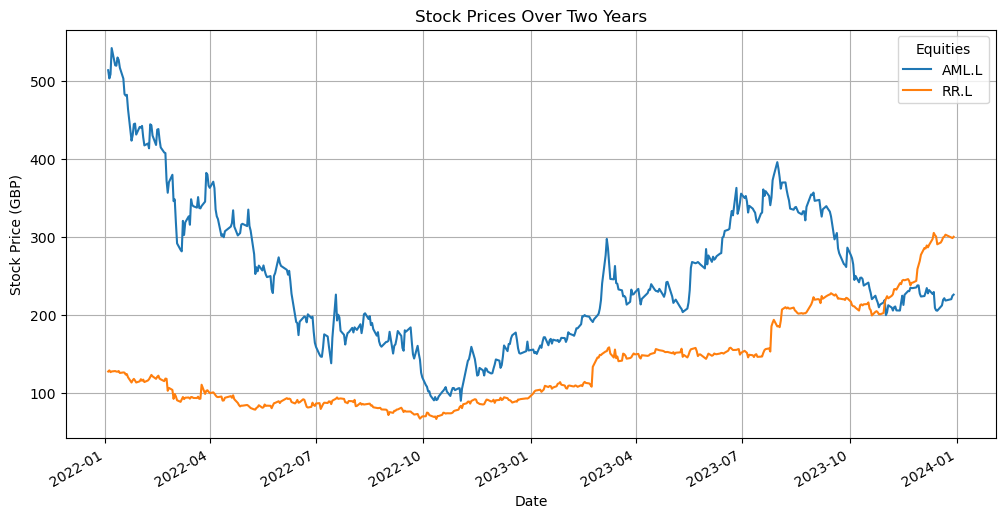

In [340]:
# Plot stock prices
data.plot(figsize=(12,6), title='Stock Prices Over Two Years')
plt.xlabel('Date')
plt.ylabel('Stock Price (GBP)')
plt.legend(title='Equities')
plt.grid()
plt.show()

In [342]:
# Compute daily returns
daily_returns = data.pct_change().dropna()

In [344]:
# Calculate annualised average returns 
annual_returns = daily_returns.mean() * 252  # Assuming 252 trading days in a year

In [346]:
print ("Annualised Returns:\n", annual_returns)

Annualised Returns:
 Ticker
AML.L   -0.109771
RR.L     0.547903
dtype: float64


In [348]:
# Calculate standard deviations
annual_std_dev = daily_returns.std() * np.sqrt(252)

In [350]:
print("Annualised Standard Deviations:\n", annual_std_dev)

Annualised Standard Deviations:
 Ticker
AML.L    0.789780
RR.L     0.487062
dtype: float64


In [352]:
#2. c)
# Compute correlation matrix
correlation = daily_returns.corr()

In [354]:
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
 Ticker     AML.L      RR.L
Ticker                    
AML.L   1.000000  0.278783
RR.L    0.278783  1.000000


In [358]:
# Compute 30-day rolling correlation
rolling_corr = daily_returns['AML.L'].rolling(window=30).corr(daily_returns['RR.L'])

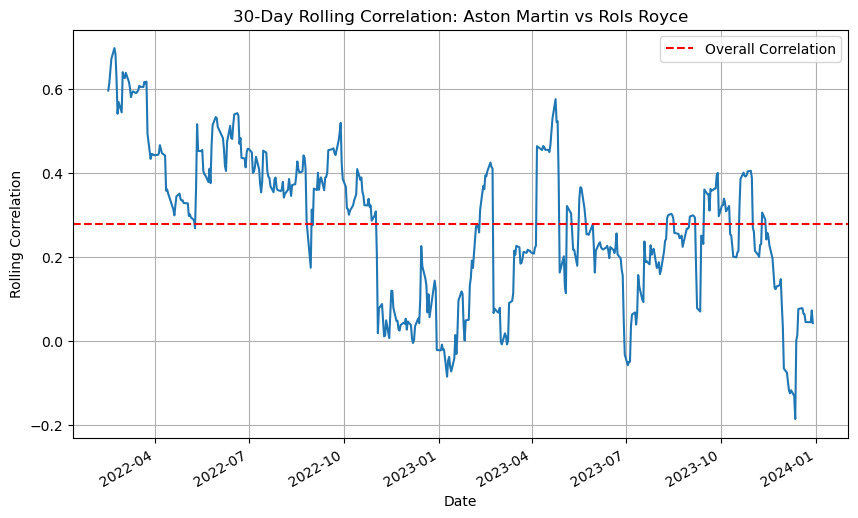

In [362]:
# Plot rolling correlation
ax = rolling_corr.plot(figsize=(10,6), title='30-Day Rolling Correlation: Aston Martin vs Rols Royce')
ax.axhline(daily_returns.corr().iloc[0,1], color='r', linestyle='--', label='Overall Correlation')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.grid()
plt.show()

In [665]:
#2. d)
# Define moving average and volume window
short_window = 20
long_window = 40
volume_window = 30  # Volume average window

In [673]:
# Create trading signals for both Aston Martin and Rolls Royce
signals = pd.DataFrame(index=data.index)

In [675]:
for stock in ['AML.L', 'RR.L']:  # Loop through each stock
    signals[f'{stock}_Price'] = data[stock]  # Store closing price for analysis
    signals[f'{stock}_Short_SMA'] = data[stock].rolling(window=short_window).mean()  # Compute 20-day SMA
    signals[f'{stock}_Long_SMA'] = data[stock].rolling(window=long_window).mean()  # Compute 40-day SMA
    
    # Fetch and align volume data
    volume_data = yf.download(stock, start='2022-01-01', end='2024-01-01')['Volume']
    signals[f'{stock}_Volume'] = volume_data.reindex(data.index).fillna(0)  # Align index & fill missing values
    signals[f'{stock}_Volume_SMA'] = signals[f'{stock}_Volume'].rolling(window=volume_window).mean()  # Compute 20-day volume SMA
    
    # Buy/Sell signals (Ensuring crossover confirmation)
    signals[f'{stock}_Signal'] = 0
    signals.loc[(signals[f'{stock}_Short_SMA'].shift(1) <= signals[f'{stock}_Long_SMA'].shift(1)) & 
                (signals[f'{stock}_Short_SMA'] > signals[f'{stock}_Long_SMA']) & 
                (signals[f'{stock}_Volume'] > signals[f'{stock}_Volume_SMA']), f'{stock}_Signal'] = 1  # Buy signal
    
    signals.loc[(signals[f'{stock}_Short_SMA'].shift(1) >= signals[f'{stock}_Long_SMA'].shift(1)) & 
                (signals[f'{stock}_Short_SMA'] < signals[f'{stock}_Long_SMA']) & 
                (signals[f'{stock}_Volume'] > signals[f'{stock}_Volume_SMA']), f'{stock}_Signal'] = -1  # Sell signal

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


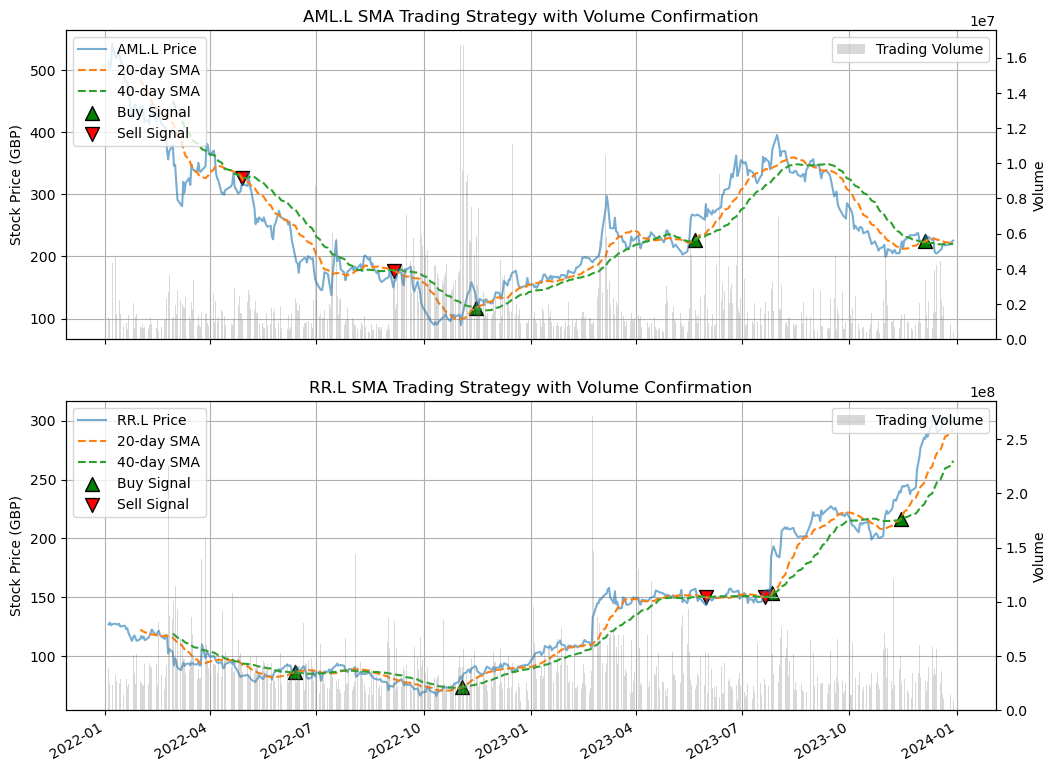

In [677]:
# Plot the trading strategy for both stocks
fig, axes = plt.subplots(2, 1, figsize=(12,10), sharex=True)

for i, stock in enumerate(['AML.L', 'RR.L']):
    ax1 = axes[i]  # Main y-axis for stock price
    ax2 = ax1.twinx()  # Secondary y-axis for volume

    # Plot stock price and moving averages
    ax1.plot(signals.index, signals[f'{stock}_Price'], label=f'{stock} Price', alpha=0.6)
    ax1.plot(signals.index, signals[f'{stock}_Short_SMA'], linestyle='dashed', label='20-day SMA')
    ax1.plot(signals.index, signals[f'{stock}_Long_SMA'], linestyle='dashed', label='40-day SMA')

    # Buy & Sell signals
    buy_signals = signals[signals[f'{stock}_Signal'] == 1]
    sell_signals = signals[signals[f'{stock}_Signal'] == -1]
    
    ax1.scatter(buy_signals.index, buy_signals[f'{stock}_Short_SMA'], marker='^', color='green', label='Buy Signal', alpha=1, edgecolors='black', s=100)
    ax1.scatter(sell_signals.index, sell_signals[f'{stock}_Short_SMA'], marker='v', color='red', label='Sell Signal', alpha=1, edgecolors='black', s=100)

    # Configure stock price axis
    ax1.set_ylabel('Stock Price (GBP)')
    ax1.legend(loc='upper left')
    ax1.grid()

    # Plot volume as a bar chart
    ax2.bar(signals.index, signals[f'{stock}_Volume'], color='gray', alpha=0.3, label='Trading Volume')
    ax2.set_ylabel('Volume')
    ax2.legend(loc='upper right')

    # Set title
    ax1.set_title(f'{stock} SMA Trading Strategy with Volume Confirmation')

plt.gcf().autofmt_xdate()
plt.show()